In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib.ticker import MaxNLocator
from factor_analyzer import FactorAnalyzer
from matplotlib.pyplot import figure, show
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
import seaborn as sns

In [6]:
!pip install factor_analyzer

In [7]:
df = pd.read_csv("House_prices_kk.csv")

In [8]:
df.head()

,Unnamed: 0,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
1,2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
2,3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
3,4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992
4,5,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994


In [9]:
x = df.drop([df.columns[0],df.columns[1],df.columns[13]], axis = 1)

In [10]:
x.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built
0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955
1,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966
2,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963
3,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976
4,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938


In [11]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4311 entries, 0 to 4310
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       4311 non-null   float64
 1   bathrooms      4311 non-null   float64
 2   sqft_living    4311 non-null   int64  
 3   sqft_lot       4311 non-null   int64  
 4   floors         4311 non-null   float64
 5   waterfront     4311 non-null   int64  
 6   view           4311 non-null   int64  
 7   condition      4311 non-null   int64  
 8   sqft_above     4311 non-null   int64  
 9   sqft_basement  4311 non-null   int64  
 10  yr_built       4311 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 370.6 KB


In [12]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [13]:
x_scaled.shape

(4311, 11)

In [14]:
pca = PCA(0.95)
x_pca = pca.fit_transform(x_scaled)
x_pca.shape

(4311, 9)

In [15]:
pca.explained_variance_ratio_

array([0.32862004, 0.17483031, 0.11358437, 0.09153602, 0.07535698,
       0.06062632, 0.05418579, 0.03996961, 0.03930166])

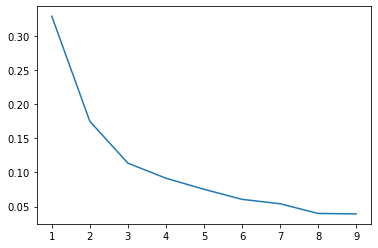

In [16]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [17]:
pca.n_components_

9

In [18]:
pca = PCA(n_components=3)
x_pca1 = pca.fit_transform(x_scaled)
x_pca.shape

(4311, 9)

In [19]:
print(pca.explained_variance_ratio_)

[0.32862004 0.17483031 0.11358437]


In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x,df.price,test_size=0.2,random_state=7)

In [22]:
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [23]:
from sklearn.metrics import accuracy_score, r2_score,mean_squared_error
#print(accuracy_score(y_test, y_pred))
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.48589900845618617
25973250268.483025


In [127]:
x_train, x_test, y_train, y_test = train_test_split(x_pca1,df.price,test_size=0.2,random_state=7)
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.35863759091090985
32402711992.529675


Factor Analysis

In [26]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

In [31]:
chi_square_value,p_value=calculate_bartlett_sphericity(x_scaled)
print(chi_square_value, p_value)

nan nan


In [32]:
kmo_all,kmo_model = calculate_kmo(x_scaled)
print(kmo_model)

0.6719796046714401


C:\Users\Abhijeet Khopade\anaconda3\lib\site-packages\factor_analyzer\utils.py:249: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn('The inverse of the variance-covariance matrix '


In [43]:
factor = FactorAnalyzer(9, rotation = None)
factor.fit(x_scaled)
FactorAnalyzer(bounds=(0.005,1),impute = 'median',is_corr_matrix=False, method = 'minren', n_factors = 3,rotation=None, rotation_kwargs = {}, use_smc = True)
ev, v = factor.get_eigenvalues()

In [44]:
ev

array([3.61482045e+00, 1.92313342e+00, 1.24942803e+00, 1.00689619e+00,
       8.28926778e-01, 6.66889528e-01, 5.96043726e-01, 4.39665699e-01,
       4.32318244e-01, 2.41877939e-01, 7.93775191e-15])

In [45]:
v

array([ 3.44469260e+00,  1.67540224e+00,  6.42468836e-01,  5.70135083e-01,
        2.72138196e-01,  1.23644010e-01,  1.03893358e-01,  3.95889237e-02,
        4.62716233e-03,  3.90016890e-05, -3.00519690e-03])

In [48]:
xvals = range(1, x.shape[1]+1)

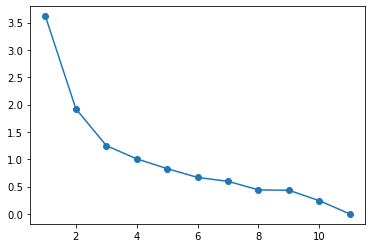

In [49]:
plt.scatter(xvals, ev)
plt.plot(xvals,ev)

In [50]:
fa = FactorAnalyzer()
fa.fit(x)
ev,v = fa.get_eigenvalues()
count = sum(1 for i in ev if i > 1)
print(count)
big_evs = sum(i for i in ev if i > 1)
total_evs = sum(ev)
print(big_evs)
print(float(big_evs/total_evs))

4
7.7942780854762415
0.7085707350432963


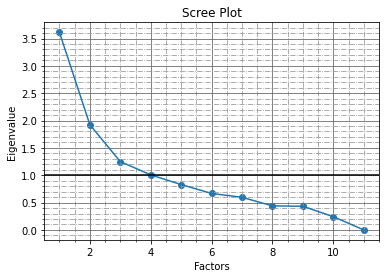

In [51]:
#plotting scree-plot:
plt.scatter(range(1,x.shape[1]+1),ev)
plt.plot(range(1,x.shape[1]+1),ev) 
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.axhline(1.0, color = 'black') #visualise which eigenvalues are above and below 1
plt.grid(b=True, which='major', color='#666666', linestyle='-')
# Show the minor grid lines with very faint and almost transparent grey lines
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-.')
plt.show()
#visualisation of the 4 eigenvalues > 1.

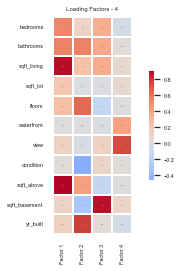

In [60]:
#Performing Factor Analysis:
fa2 = FactorAnalyzer(count, rotation="varimax")
fa2.fit(x)
x_labels = ['Factor ' + str(i) for i in range(1,count+1)]
y_labels = x.columns.tolist()
sns.set(font_scale=0.5)
plt.title('Loading Factors - ' + str(count))
load = sns.heatmap(fa2.loadings_,cmap="coolwarm", xticklabels = x_labels, yticklabels = y_labels, center=0, square=True, linewidths=.2,cbar_kws={"shrink": 0.5}, annot = True, annot_kws={"fontsize":1})

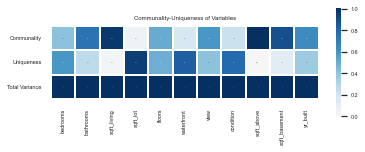

In [65]:
var_check = np.vstack((fa2.get_communalities(), fa2.get_uniquenesses(),np.array(fa2.get_communalities() + fa2.get_uniquenesses()))).tolist()
y_labels = ['Communality','Uniqueness', 'Total Variance']
x_labels = x.columns.tolist()
sns.set(font_scale=0.5)
plt.title('Communality-Uniqueness of Variables')
load = sns.heatmap(var_check,cmap="RdBu", xticklabels = x_labels, yticklabels = y_labels, center=0, square=True, linewidths=.2,cbar_kws={"shrink": 0.5}, annot = True, annot_kws={"fontsize":1})

In [66]:
x_train, x_test, y_train, y_test = train_test_split(x,df.price,test_size=0.2,random_state=7)

In [77]:
print(fa2)

FactorAnalyzer(n_factors=4, rotation='varimax', rotation_kwargs={})


In [67]:
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [68]:
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.48589900845618617
25973250268.483025


In [71]:
x_train, x_test, y_train, y_test = train_test_split(fa2,df.price,test_size=0.2,random_state=7)
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

TypeError: Singleton array array(FactorAnalyzer(n_factors=4, rotation='varimax', rotation_kwargs={}),
      dtype=object) cannot be considered a valid collection.